# Introduction

In this project, we work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the [Technical and Further Education (TAFE)](https://en.wikipedia.org/wiki/Technical_and_further_education) institute in Queensland, Australia. 

These are the main two questions we try to answer in this project:
 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 
Here´s the workflow we follow to answer these questions:
 - initial exploration and identifying the columns needed for this project;
 - filtering only the answers from the respondents who resigned, leaving out the respondents who left the job due to other reasons (i.e. retirement, expired contracts, etc.);
 - check for the anomalies in dates containing columns;
 - calculate the number of years each respondent worked for an institute;
 - identify the respondents who resigned due to some kind of dissatisfaction;
 - combine the data frames;
 - clean the columns containing the years of service and age of the respondents;
 - aggregate the data by years of service and age and see how many resignations were caused by dissatisfaction in each category (different visualizing techniques will be used)
 - check if there´s any difference in the distribution of dissatisfied employees of DETE and TAFE by separate.
 
The libraries used in the project are pandas, Numpy, matplolib and Seaborn.
 
The conducted analysis showed that there are more resignations due to dissatisfaction among employees with 7 or more years of service and young employees (25 y.o. or younger) tend to be more satisfied with their jobs then their older colleagues. The TAFE employees in each category on average seem to resign less due to dissatisfaction than the DETE employees.   

# Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = 150 # to avoid truncated output 

In [2]:
#reading in the files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
#quick exploration of the data
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Number of missing values in the DETE survey:')
dete_survey.isnull().sum()

Number of missing values in the DETE survey:


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
#descriptive statistic for all the non-numeric columns
dete_survey.describe(exclude=[np.number])

,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32


Observations for DETE survey:
 - there´re many columns that we are not going to need for the analysis
 - the value `'Not Stated'` used in some columns indicates missing values but they are not represented as `'Nan'`

In [6]:
#quick exploration of the data
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [7]:
#df.describe() method for all the non-numeric columns
tafe_survey.describe(exclude=[np.number])

,Institute,WorkArea,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?,InductionInfo. Induction

Observations for the TAFE survey:
 - there´re many columns that we are nor going to need for the analysis
 - some columns coincide by its meaninf with those from the DETE survey but the columns names are different
 - the `'-'` value used in some columns frequently, but it´s not clear at this point if it´s used to indicate missing values or a negative answer. We´ll check it later. 

# Identifying the Missing Values and Dropping the Unnecessary Columns

## Standardizing Columns' Names and Dropping the Unnecessary Columns

In [8]:
#reading in the DETE survey with 'Not Stated' values as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [9]:
#dropping unnecessary columns 
idx = np.r_[28:49, 51:56] #columns tp drop in the DETE dataframe
dete_survey_updated = dete_survey.drop(dete_survey.columns[idx], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[18:66], axis=1)

Initially the TAFE survey column `'Main Factor. Which of these was the main factor for leaving?'` might be useful for our analysis but it has got only 113 non-null values out of 702 entries. Let´s take a deeper look at this column to decide if to keep it or drop it.  

In [10]:
tafe_survey_updated.iloc[:,17].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Travel                                        2
Study                                         2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

Despite of few non-null values, we´re going to keep it as it might give us some extra information on the reasons of resignation. 

As we mentioned before, in both data frames there´re various columns that are similar by its meaning but named differently. So next step we´ll be to standardize the column names in order to be able to conduct an adequate comparisons and to eventually to combine both datasets.

In [11]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age'],
      dtype='object')

In [12]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurren

In [13]:
#standardizing the DETE survey columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older


In [14]:
#renaming the TAFE survey columns
new_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 
             'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
             'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
             'Main Factor. Which of these was the main factor for leaving?': 'main_factor'}

tafe_survey_updated.rename(new_names, axis=1, inplace = True)
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,main_factor,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Identifying the Missing Values

We are going to have a quick view of the missing data in both data frames using heat maps. 

Text(0.5, 1.0, 'Missing Values in DETE_SURVEY_UPDATED')

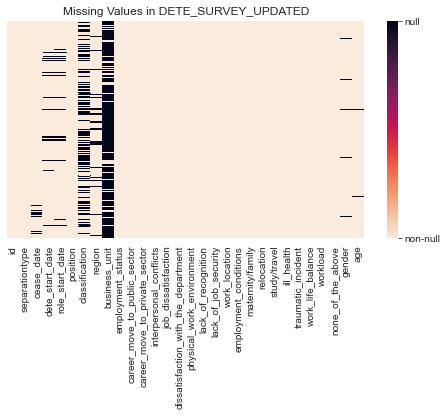

In [57]:
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.cm.rocket_r #colormap reverse 
ax=sns.heatmap(dete_survey_updated.isnull(), cbar=True, cmap=cmap)
#customizing the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['non-null', 'null'])
ax.tick_params(left=False, labelleft=False)
ax.set_title('Missing Values in DETE_SURVEY_UPDATED')

In the DETE survey dataset the columns with the most missing values are `'business_unit'` and `'classification'` followed by `'dete_start_date'` and `'role_start_date'`. Other columns with some data missing are `'cease_date'`, `'position'`, `'region'`, `'employment_status'`, `'gender'`and `'age'`.  

Text(0.5, 1.0, 'Missing Values in TAFE_SURVEY_UPDATED')

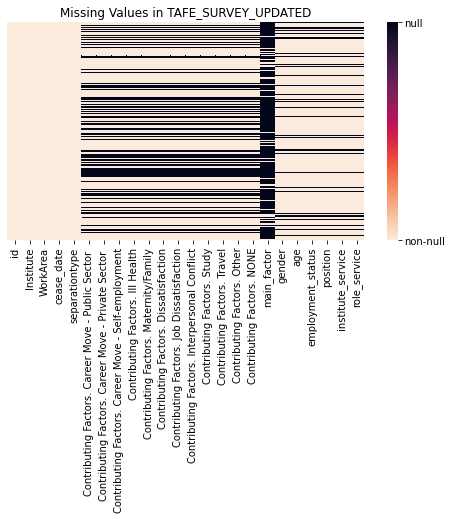

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.cm.rocket_r #colormap reverse 
ax=sns.heatmap(tafe_survey_updated.isnull(), cbar=True, cmap=cmap)
#customizing the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['non-null', 'null'])
ax.tick_params(left=False, labelleft=False)
ax.set_title('Missing Values in TAFE_SURVEY_UPDATED')

In the TAFE survey data frame the most problematic column in terms of missing data is the `'main_factor'` column followed by all the columns containing the info on other 'Contributing Factors'. Luckily, the most important column for our analysis, the `'separationtype'` has got almost no missing values. 

# Filtering the Data by the Resignation Reason

We´ll take a look at the resignation reasons applying Series.value_counts() method on the `'separationtype'`columns of both data frames. 

In [17]:
#DETE separation types
dete_survey_updated['separationtype'].value_counts(ascending=False, dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
#TAFE separation types
tafe_survey_updated['separationtype'].value_counts(ascending=False, dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

One of the end goals of our analysis is to answer the following question:
 - Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
 
So, we are going to keep only the entries from the respondents who resigned, so their separation type contains the 'Resignation' string 

In [19]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r'Resignation')].copy()
dete_resignations['separationtype'].value_counts(ascending=False, dropna=False)
                                       

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [20]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts(ascending=False, dropna=False)

Resignation    340
Name: separationtype, dtype: int64

# Verifying the Dates Containing Columns

In [21]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

No irregularities were found regarding the cessation years in the DETE survey. 

Let´s check now the `'dete_start_date'` column. We´ll check first if there are any outliers and also if there are any entries with a employment start date more recent than a cessation date.   

In [23]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

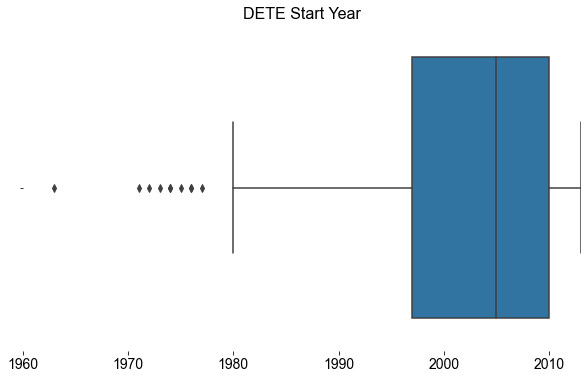

In [24]:
#plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('white')
ax = sns.boxplot(dete_resignations['dete_start_date'])

#plot aesthetics
ax.set_title('DETE Start Year', fontsize=16)
ax.set_xlim(1960, 2013)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(labelsize=14)


There´s only one outlier, someone who started to work in 1963. But considering the fact that the latest resignations were in 2013, it might be just an extraordinary but realistic situation. Let´s check now if there´re some errors regarding the relation between `'dete_start_date'` and `'cease_date'` columns.

In [25]:
print('Number of entries with the start date later than the cease date:', 
      dete_resignations[dete_resignations['dete_start_date'] > dete_resignations['cease_date']].shape[0])

Number of entries with the start date later than the cease date: 0


In general no irregularities with the dates columns in the DETE survey were found.

In [26]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

No resignations from the future are seen in the TAFE survey neither. So we confirm that the data in both dataframes is realistic and we´ll continue tiding the data. 

# Creating a New Column, `'institute_service'`, in the DETE Data Frame

The question we´d like to answer in the analysis is:
 - Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The TAFE survey provides us with the column `'institute_service'` which contains the data on how long an employee had worked for the organization before his/her resignation. The DETE survey doesn´t have any similar column, but having the employment start year and the cessation year we can calculate in easily.

In [27]:
#calculating the institute service for the DETE survey
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

# Identifying the Dissatisfied Employees

Our next step will be to identify the dissatisfied employees in both data frames. To do that we´ll use the following columns:
 1. dete_resignations:
  - `'job_dissatisfaction'`
  - `'dissatisfaction_with_the_department'`
  - `'physical_work_environment'`
  - `'lack_of_recognition'`
  - `'lack_of_job_security'`
  - `'work_location'`
  - `'employment_conditions'`
  - `'work_life_balance'`
  - `'workload'`
 2. tafe_resignations:
  - `'main_factor'`
  - `'Contributing Factors. Dissatisfaction'`
  - `'Contributing Factors. Job Dissatisfaction'`


If the employee indicated any of the factors above caused them to resign or indicated any kind of dissatisfaction as the main factor to resign (the column `'main_factor'` in the TAFE survey), we´ll mark them as `dissatisfied` in a new column. 

 The DETE survey columns we are interested in contain the boolean type data. We don´t have to do any kind of preparation of this data. But we do have to transform the TAFE survey columns. Let´s start with the `'main_factor'`.

In [28]:
tafe_resignations['main_factor'].value_counts(dropna=False)

NaN                                         244
Dissatisfaction with %[Institute]Q25LBL%     19
Job Dissatisfaction                          17
Other                                        17
Career Move - Private Sector                 16
Interpersonal Conflict                        8
Career Move - Public Sector                   6
Maternity/Family                              4
Career Move - Self-employment                 3
Travel                                        2
Ill Health                                    2
Study                                         2
Name: main_factor, dtype: int64

In a new column, `'main_factor_dissatisfaction'` we are going to mark as True those who indicated 'Job Dissatisfaction' and 'Dissatisfaction with %[Institute]Q25LBL%' as the main factor to resign and as False the rest of the respondents, the NaN values will stay as NaN. 

In [29]:
tafe_resignations['main_factor_dissatisfaction'] = tafe_resignations['main_factor'].str.contains(r'Dissatisfaction')
tafe_resignations['main_factor_dissatisfaction'].value_counts(dropna=False)

NaN      244
False     60
True      36
Name: main_factor_dissatisfaction, dtype: int64

 The pattern of values in the 'Contributing Factors' columns is similar. 

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We will create a function that does the following:

   - If the value is NaN, return np.nan.
   - If the value is "-", return False. Since there are already some missing values, we can't treat hyphens as NaN values.
   - For other values, return True.



In [32]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

We now apply this function to both columns using the DataFrame.applymap() method.

In [33]:
contributing_factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[contributing_factors] = tafe_resignations[contributing_factors].applymap(update_vals)                  

As the `'main_factor_dissatisfaction'` column has got a lot of null values, it can interfere to the results after applying `df.any()` method. So let´s check first if it can help us to detect more resignation due to dissatisfaction cases than the contributing factors columns give us. It can happen only in cases when the main factor was marked as 'Dissatisfaction', but the contributing factors columns were left either with missing value or `False` value. 

In [34]:
tafe_resignations.loc[tafe_resignations['main_factor_dissatisfaction'] == True, contributing_factors]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
17,False,True
20,True,True
26,True,True
47,True,False
52,False,True
86,True,True
100,True,False
102,True,False
103,True,True
114,False,True


As we can see, all the rows with the main factor for resignations marked as dissatisfaction also have got either one or the other contributing factor marked as True, or both of them. So we can conclude that both `'main_factor'` and `'main_factor_dissatisfaction'` are not necessary for our analysis and drop them.

In [35]:
tafe_resignations = tafe_resignations.drop(tafe_resignations[['main_factor', 'main_factor_dissatisfaction']], axis=1)
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now we can create the `'dissatisfied'` column in both data frames applying `df.any()` method.

In [36]:
#applying df.any() method, DETE survey
dete_resignations['dissatisfied'] = dete_resignations[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']].any(axis=1, skipna=False)

#checking if the result is correct
dete_resignations['dissatisfied'].value_counts(dropna=False) 

False    162
True     149
Name: dissatisfied, dtype: int64

In [37]:
#applying df.any() method, TAFE survey
tafe_resignations['dissatisfied'] = tafe_resignations[[ 'Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

#checking if the result is correct
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
#creating copies of both data frames to avoid SettingWithCopy Warning in the next steps
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

# Combining the Data Frames

Before combining the data frames, let´s take another look on their heat maps which indicate missing values.  

Text(0.5, 1.0, 'Missing Values in DETE_RESIGNATIONS_UP')

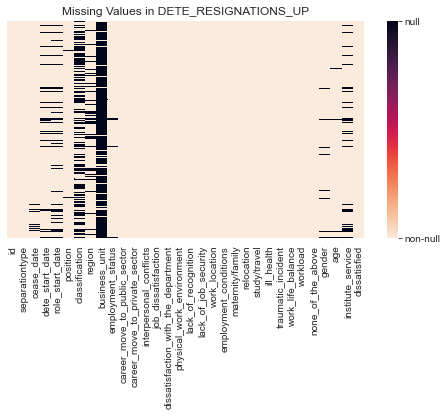

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.cm.rocket_r #colormap reverse 
ax=sns.heatmap(dete_resignations_up.isnull(), cbar=True, cmap=cmap)
#customizing the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['non-null', 'null'])
ax.tick_params(left=False, labelleft=False)
ax.set_title('Missing Values in DETE_RESIGNATIONS_UP')

Text(0.5, 1.0, 'Missing Values in TAFE_RESIGNATIONS_UP')

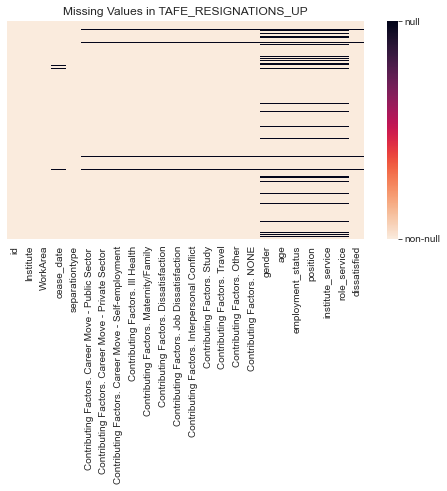

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.cm.rocket_r #colormap reverse 
ax=sns.heatmap(tafe_resignations_up.isnull(), cbar=True, cmap=cmap)
#customizing the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['non-null', 'null'])
ax.tick_params(left=False, labelleft=False)
ax.set_title('Missing Values in TAFE_RESIGNATIONS_UP')

There are still some columns, especially in the DETE data frame, that have quite a few missing values. Also, considering that by now we have done a major part of the cleaning of the data, we can leave behind several columns which served us as a source to get information on the resignations due to any kind of job dissatisfaction but which we are not going to use in further analysis.   

In [41]:
#dropping the unnecessary columns, keeping only the columns in commun
cols_in_commun = ['id', 'separationtype', 'cease_date', 'position', 'employment_status', 'gender', 'age', 'institute_service',
       'dissatisfied']
dete_resignations_up = dete_resignations_up[cols_in_commun]
tafe_resignations_up = tafe_resignations_up[cols_in_commun]


Now the data frames are ready to be combined. To combine them we´ll use the `pd.concat()` function.

In [42]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


Text(0.5, 1.0, 'Missing Values in COMBINED data frame')

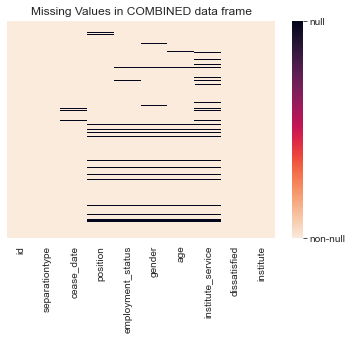

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))
cmap = sns.cm.rocket_r #colormap reverse 
ax=sns.heatmap(combined.isnull(), cbar=True, cmap=cmap)
#customizing the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['non-null', 'null'])
ax.tick_params(left=False, labelleft=False)
ax.set_title('Missing Values in COMBINED data frame')

There´re only minor number of missing values in the new combined data frame. But before we move to the analysis we have to do some more cleaning of `'institute_service'` and `'age'` columns. 

# Cleaning the `'institute_service'` and `'age'` Columns

In [44]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
10.0                   6
12.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


There´s an [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) by Business Wire, "Age is Just a Number: Engage Employees by Career Stage, Too", which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We´ll use a slightly modified classification:
 - New: Less than 3 years at a company
 - Experienced: 3-6 years at a company
 - Established: 7-10 years at a company
 - Veteran: 11 or more years at a company



So, we have to categorize the data in the `'institute_service'` using the classification above.  First, we´ll extract the years of service from the column (the intervals will be processed by their highest value).

In [45]:
#extracting the years of service from each value in the institute_service column
combined['institute_service'] = (combined['institute_service'].astype(str) #convert to string
                                 .str.replace(r'\.0', '') #deal with values like '5.0', etc.
                                 .str.replace(r'[1-7][1]*-', '') #keep the max value from the intervals like '1-2' etc.
                                 .str.extract(r'([0-9]{1,2})') #extract the numeric values only
                                 .astype(float)) #convert to float

#check if the data is correct
combined['institute_service'].value_counts(dropna=False)                                          


1.0     95
NaN     88
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
3.0     20
0.0     20
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
14.0     6
22.0     6
17.0     6
12.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
21.0     3
19.0     3
32.0     3
36.0     2
30.0     2
26.0     2
25.0     2
28.0     2
42.0     1
29.0     1
35.0     1
27.0     1
41.0     1
38.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

Now each value will be classified by one of the definitions, the result will be saved to a new `'service_cat'` column.

In [46]:
#splitting the years of service into service categories 
service_bins = [-1, 2, 6, 10, 49]
service_labels = ['New', 'Experienced', 'Established', 'Veteran']
combined['service_cat'] = pd.cut(combined['institute_service'], bins=service_bins, labels=service_labels)

#check if the data is correct
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Let´s proceed with the `'age'` column

In [47]:
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We are going to aggregate the age values into bigger groups according to the [OECD classification](https://data.oecd.org/emp/employment-rate-by-age-group.htm) for the working age populations with some minor adjustments: 
   - 25 or younger (those just entering the labor market following education);
   - 26 - 55 years old (those in their prime working lives);
   - 56 or older (those passing the peak of their career and approaching retirement).

In [48]:
#clean the data
combined['age'] = combined['age'].str.extract(r'(\d+)').astype(float)

#check if the data is correct
combined['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [49]:
#split the 'age' column into groups
age_groups = [0, 25, 55, 61]
age_labels = ['25 or younger', '26 - 55 y.o.', '56 or older']
combined['age_groups'] = pd.cut(combined['age'], bins=age_groups, labels=age_labels)

#check if the data is correct
combined['age_groups'].value_counts(dropna=False)

26 - 55 y.o.     446
56 or older       78
25 or younger     72
NaN               55
Name: age_groups, dtype: int64

# Data Analysis

Now we are ready to perform the analysis and answer the goal questions we defined in the beginning.

Let´s first confirm the number of each value in the `'dissatisfied'` column.

In [50]:
#check the number of each value in the 'dissatisfied' column
combined['dissatisfied'].value_counts(ascending=False, dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

There´re 8 missing values which we are going to replace with the most frequent value, `False`.

In [51]:
#fill the missing values
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)


## Job Dissatisfaction by Service Category

The first question we´d like to answer in our analysis is:
 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

We´ll use a pivot table to aggregate the data and calculate the percentage of the resignations due to dissatisfaction in each category of the `'service_cat'` group. Then we´ll visualize the results with a bar plot.

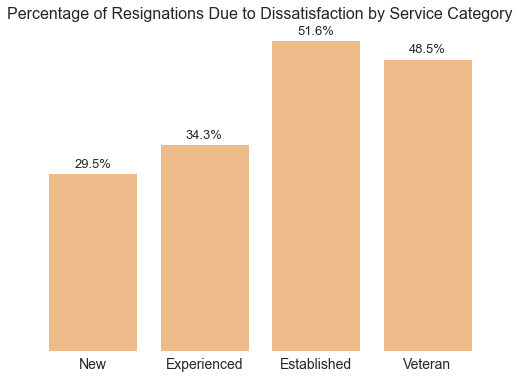

In [52]:
dis_per_cat = combined.pivot_table(index='service_cat',values='dissatisfied').reset_index()

#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
cat_order=['New', 'Experienced', 'Established', 'Veteran']
ax=sns.barplot(x='service_cat', y='dissatisfied', data=dis_per_cat, order=cat_order, color=[255/255, 188/255, 121/255])

#plot aesthetics
ax.set_title('Percentage of Resignations Due to Dissatisfaction by Service Category', fontsize=16)
sns.despine(left=True, bottom=True)
ax.set(xlabel='', ylabel='')
ax.tick_params(labelsize=14, labelleft=False)

#annotating the values on the plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p. get_xy()
    ax.annotate('{:.1%}'.format(height), (x + 0.5 * width, y + height + 0.01), size=13, ha='center')

Almost half of the resigned employees with more than 11 years of service indicated that the resignation took place due to some kind of job dissatisfaction while newbees and employees with 3-11 years of service tend to resign due to other reasons.   

Let´s check now the absolute numbers of dissatisfied employees by each service category.

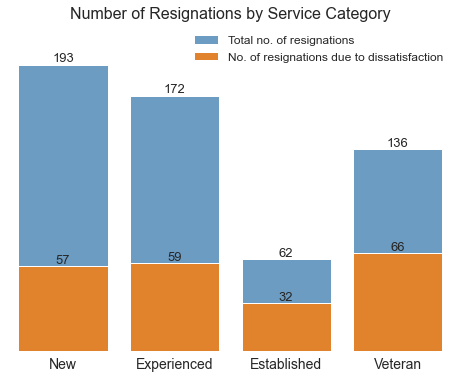

In [53]:
cat_abs = combined.pivot_table(index='service_cat',values='dissatisfied', aggfunc=len).reset_index()
dis_per_cat_abs = combined.pivot_table(index='service_cat',values='dissatisfied', aggfunc=np.sum).reset_index()

#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
cat_order=['New', 'Experienced', 'Established', 'Veteran']
ax=sns.barplot(x='service_cat', y='dissatisfied', data=cat_abs, order=cat_order, color=[95/255, 158/255, 209/255], label='Total no. of resignations')
bottom_ax=sns.barplot(x='service_cat', y='dissatisfied', data=dis_per_cat_abs, order=cat_order, color=[255/255, 128/255, 14/255], label='No. of resignations due to dissatisfaction')

#plot aesthetics
ax.set_title('Number of Resignations by Service Category', fontsize=16)
sns.despine(left=True, bottom=True)
ax.set(ylim=(0, 220), xlabel='', ylabel='')
ax.tick_params(labelsize=14, labelleft=False)

#creating the legend
ax.legend(ncol=1, loc="upper right", frameon=False, prop={'size':12})

#annotating the values on the plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p. get_xy()
    ax.annotate('{:.0f}'.format(height), (x + 0.5 * width, y + height + 2), size=13, ha='center')

The absolute numbers of resignations due to dissatisfaction are similar in all the groups except the 'established' service category, the difference is in sizes of the groups. The employees with 7-11 years of experience ('established' category) seem to resign less based on the surveys than the employees of other service categories but the percentage of the resignations due to dissatisfaction in this group is the highest one.  

## Job Dissatisfaction By Age

The second question we try to answer is:
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We´ll use a pivot table to aggregate the data and calculate the percentage of the resignations due to dissatisfaction in each age. Then we´ll visualize the results with a bar plot.

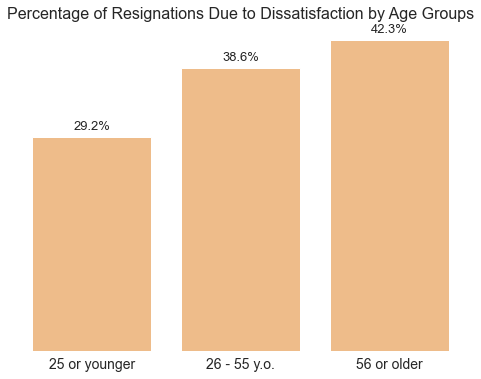

In [54]:
age_per_cat = combined.pivot_table(index='age_groups',values='dissatisfied').reset_index()

#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
group_order=['25 or younger', '26 - 55 y.o.', '56 or older']
ax=sns.barplot(x='age_groups', y='dissatisfied', data=age_per_cat, order=group_order, color=[255/255, 188/255, 121/255])

#plot aesthetics
ax.set_title('Percentage of Resignations Due to Dissatisfaction by Age Groups', fontsize=16)
sns.despine(left=True, bottom=True)
ax.set(xlabel='', ylabel='')
ax.tick_params(labelsize=14, labelleft=False)

#annotating the values on the plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p. get_xy()
    ax.annotate('{:.1%}'.format(height), (x + 0.5 * width, y + height + 0.01), size=13, ha='center')

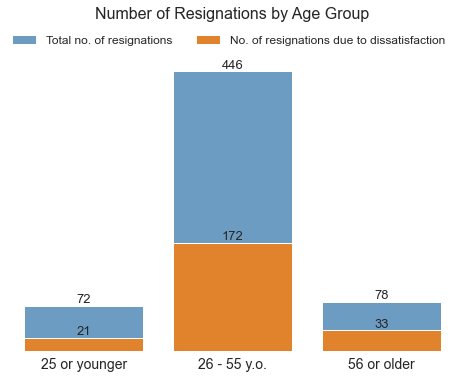

In [55]:
age_abs = combined.pivot_table(index='age_groups',values='dissatisfied', aggfunc=len).reset_index()
dis_per_age_abs = combined.pivot_table(index='age_groups',values='dissatisfied', aggfunc=np.sum).reset_index()

#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
total=sns.barplot(x='age_groups', y='dissatisfied', data=age_abs, order=group_order, color=[95/255, 158/255, 209/255], label='Total no. of resignations')
bottom_ax=sns.barplot(x='age_groups', y='dissatisfied', data=dis_per_age_abs, order=group_order, color=[255/255, 128/255, 14/255], label='No. of resignations due to dissatisfaction')

#plot aesthetics
ax.set_title('Number of Resignations by Age Group', fontsize=16)
ax.set(ylim=(0, 520), ylabel='', xlabel='')
sns.despine(left=True, bottom=True)
ax.tick_params(labelsize=14, labelleft=False)

#creating the legend
ax.legend(ncol=2, loc="upper right", frameon=False, prop={'size':12})

#annotating the values on the plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}'.format(height), (x + 0.5*width, y + height + 5), size=13, ha='center')

The younger employees on average are more satisfied with their jobs or at least they mark less the job dissatisfaction as the reason for resigning. And it´s interesting that a vast group (42,3%) of those elder than 56 form decide to resign due to dissatisfaction. Probably, when someone has got a couple of years left till the retirement, only a serious reason can cause you to  resign voluntarily, among those there should be job dissatisfaction.     

## Job Dissatisfaction by Institute

Now let´s check if the trends discovered in the previous steps are true for both institutes, DETE and TAFE, separately. Furthermore we are going to analyze the same categories and age groups separately for DETE and TAFE employees. 
First, we´ll aggregate the data by each categories (`'service-cat'`, `'institute'` and `'age_groups`') and calculate the total number of resignations in each group and the percentage of the resignations due to dissatisfaction for each group. Then, plotting the `seaborn.catplot()`, we´ll compare the results of both institutes.  

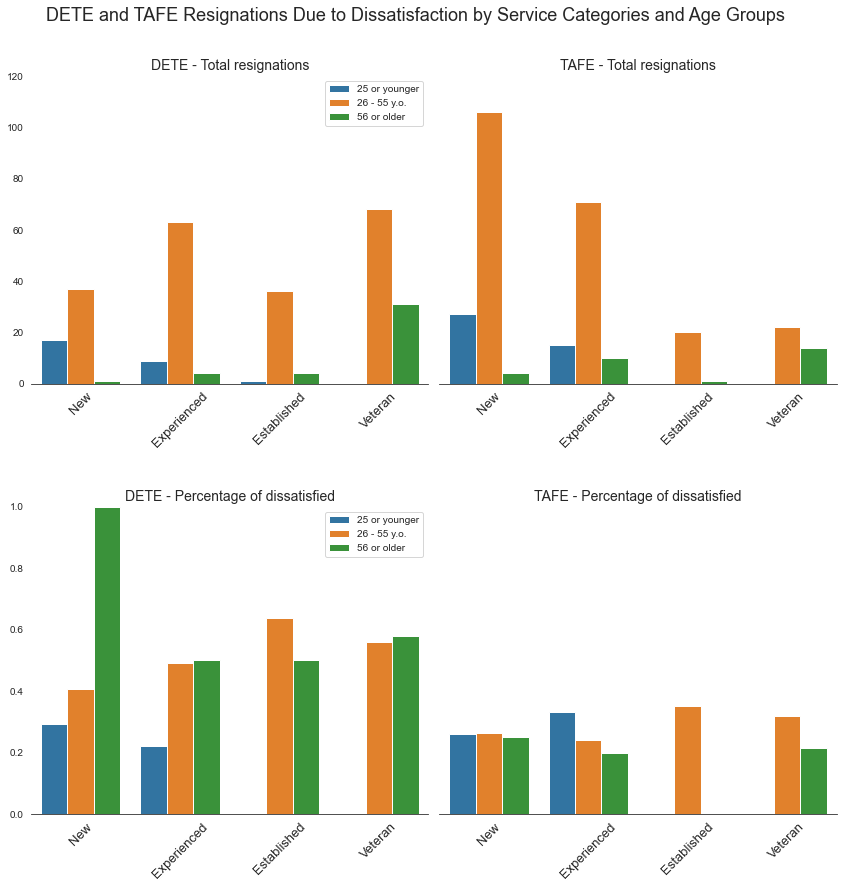

In [56]:
#calculate the total no. of resignations and the percentage of resignations due to dissatisfaction by each category
total_per_inst = combined.pivot_table(index=['service_cat', 'institute', 'age_groups'], values='dissatisfied', aggfunc=[len, np.mean]).reset_index()

#flattening the MultiIndex in columns
total_per_inst.columns = total_per_inst.columns.get_level_values(0)

#rename the columns
total_per_inst.rename({'len':'Total resignations', 'mean':'Percentage of dissatisfied'}, axis=1, inplace=True)

#transform the dataframe from wide-type to long-type
total_per_inst=pd.melt(total_per_inst, id_vars=['service_cat', 'institute', 'age_groups'], value_vars=['Total resignations', 'Percentage of dissatisfied'])

#plot
sns.set_style('white')
g = sns.catplot(data=total_per_inst, x='service_cat', y='value', hue='age_groups', 
                col='institute', row='variable', kind='bar', height=6, legend_out=False, sharey='row', sharex=False)

#plot aesthetics
g.fig.figsize=(10,6)
plt.subplots_adjust(top=.9, hspace=.4)
g.fig.suptitle('DETE and TAFE Resignations Due to Dissatisfaction by Service Categories and Age Groups', size=18)
(g.set_axis_labels('', '')
  .set_titles('{col_name} - {row_name}')
  .despine(left=True))
for ax in g.axes.ravel():
    ax.title.set(size=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, size=13)
g.axes[0,0].set_ylim(0, 120)
g.axes[0,1].set_ylim(0, 120)
g.axes[1,0].set_ylim(0, 1)
g.axes[1,1].set_ylim(0, 1)

    
#relocating the legend
g.axes[0,0].legend(loc=1)
g.axes[1,0].legend(loc=1)

These are quite interesting results that we´ve got here:
   - The most representative age group in each service category is the employees between 26 and 55 years old. Other groups are too small to evaluate the level of dissatisfaction for these groups. 
   - In the TAFE, the level of dissatisfaction among the employees who resign is distributed evenly on overall between the service categories and age groups
   - There´s no group that surpass 40% of dissatisfied employees according to the TAFE survey.
   - The DETE exit survey on contrary shows that the level of dissatisfaction among the employees of 26-55 years old varies between 40% and 60%.
   

# Conclusion

In this project, we analyzed two exit surveys done by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We have answered two questions:
 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 
There are more resignations due to dissatisfaction among employees with 7 or more years of service and young employees (25 y.o. or younger) tend to be more satisfied with their jobs then their older colleagues. 

In the end we combined both service categories and age group and compared the results for each institute. The more reliable statistics could be obtained only for the employees between 26 and 55 years old, other groups resulted to be quite small. In the TAFE, the level of dissatisfaction among the employees who resign is distributed evenly on overall between the service categories and age groups and in general is lower than in the DETE.
